# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `YusufMesbah.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it.
- If the instructions seem vague, use common sense.

# Task 1: ANN (30%)
For this task, you are required to build a fully connect feed-forward ANN model
for a multi-label regression problem.

For the given data, you need do proper data preprocessing, design the ANN model,
then fine-tune your model architecture (number of layers, number of neurons,
activation function, learning rate, momentum, regularization).

For evaluating your model, do $80/20$ train test split.

### Data
You will be working with the data in `Task 1.csv` for predicting students'
scores in 3 different exams: math, reading and writing. The columns include:
 - gender
 - race
 - parental level of education
 - lunch meal plan at school
 - whether the student undertook the test preparation course

In [258]:
import pandas as pd
import numpy as np

In [259]:
# read csv file
df = pd.read_csv('Task 1.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


# Preprocessing

For preprocessing part I decided to apply label encoding for columns which are not numerical. I do not expect high change of results due different encoding because dataset supposely simple.

In [260]:
# encode gender column using sklearn
from sklearn.preprocessing import LabelEncoder

df["gender"] = LabelEncoder().fit_transform(df["gender"].values)
df["race/ethnicity"] = LabelEncoder().fit_transform(df["race/ethnicity"].values)
df["parental level of education"] = LabelEncoder().fit_transform(
    df["parental level of education"].values)
df["lunch"] = LabelEncoder().fit_transform(df["lunch"].values)
df["test preparation course"] = LabelEncoder().fit_transform(
    df["test preparation course"].values)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68


In [261]:
# apply min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["math score", "reading score", "writing score"]] = scaler.fit_transform(
    df[["math score", "reading score", "writing score"]])

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,0.620690,0.547945,0.519481
1,0,3,5,0,1,0.310345,0.438356,0.415584
2,1,4,4,0,1,0.528736,0.452055,0.350649
3,1,1,2,1,1,0.735632,0.698630,0.584416
4,1,4,0,1,0,0.747126,0.630137,0.584416


In [262]:
from sklearn.model_selection import train_test_split

# get the target columns
target = df[["math score", "reading score", "writing score"]].values
# drop the target columns
df = df.drop(["math score", "reading score", "writing score"], axis=1).values

X, y = df, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.shape, y.shape

((1000, 5), (1000, 3))

In [263]:
# build fully connected feed forward ANN
import tensorflow as tf
from keras.layers import Dense, Input
import keras

model = keras.Sequential(
    [
        Dense(1024, activation="relu", name="input"),
        Dense(512, activation="relu", name="layer1"),
        Dense(256, activation="relu", name="layer2"),
        Dense(128, activation="relu", name="layer3"),
        Dense(64, activation="relu", name="layer4"),
        Dense(3, activation="softmax", name="output")
    ]
)

model.compile(loss="mean_squared_error", metrics=["accuracy"])

# split data into train and test

# we want to predict "math score" "reading score" "writing score"
# so we will drop them from the dataset


# train model
history = model.fit(X_train, y_train, batch_size=60,
                    epochs=5, verbose=1, validation_split=0.1)


Epoch 1/5
12/12 [==============================] - 2s 45ms/step - loss: 0.1046 - accuracy: 0.4444 - val_loss: 0.1027 - val_accuracy: 0.5125
Epoch 2/5
12/12 [==============================] - 0s 27ms/step - loss: 0.1024 - accuracy: 0.5319 - val_loss: 0.1012 - val_accuracy: 0.6125
Epoch 3/5
12/12 [==============================] - 0s 22ms/step - loss: 0.1021 - accuracy: 0.6083 - val_loss: 0.1008 - val_accuracy: 0.6750
Epoch 4/5
12/12 [==============================] - 0s 28ms/step - loss: 0.1017 - accuracy: 0.6486 - val_loss: 0.1007 - val_accuracy: 0.6125
Epoch 5/5
12/12 [==============================] - 0s 22ms/step - loss: 0.1016 - accuracy: 0.6653 - val_loss: 0.1005 - val_accuracy: 0.6750


In [264]:
# # hyper tune the model and find the best
# # hyper parameters
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV


# def create_model(optimizer="adam", activation="relu"):
#     model = keras.Sequential(
#         [
#             Dense(1024, activation=activation, name="input"),
#             Dense(512, activation=activation, name="layer1"),
#             Dense(256, activation=activation, name="layer2"),
#             Dense(128, activation=activation, name="layer3"),
#             Dense(64, activation=activation, name="layer4"),
#             Dense(3, activation="softmax", name="output")
#         ]
#     )

#     model.compile(loss="mean_squared_error",
#                   optimizer=optimizer, metrics=["accuracy"])
#     return model


# model = KerasRegressor(build_fn=create_model, verbose=1)

# # define the grid search parameters
# batch_size = [40, 60, 80]
# epochs = [4, 5, 6, 7]
# optimizer = ["Adam"]
# activation = ["softmax", "softsign", "relu", "tanh", "sigmoid", "linear"]

# param_grid = dict(batch_size=batch_size, epochs=epochs,
#                   optimizer=optimizer, activation=activation)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


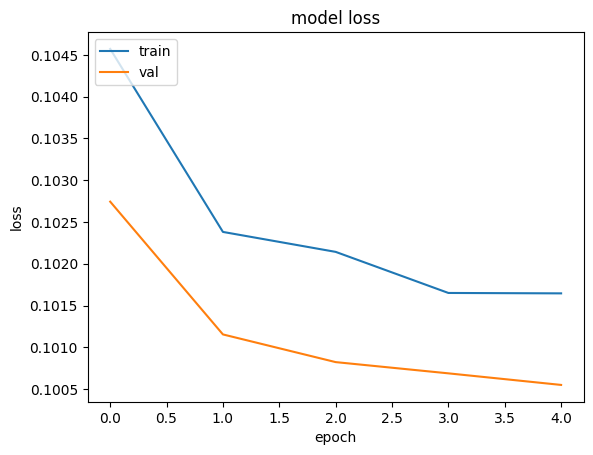

In [265]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [266]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.10522651672363281
Test accuracy: 0.675000011920929


### Questions
1. What preprocessing techniques did you use? Why?
    - *Answer*
2. Describe the fine-tuning process and how you reached your model architecture.
    - *Answer*

# Task 2: CNN (40%)
For this task, you will be doing image classification:
- First, adapt your best model from Task 1 to work on this task, and
fit it on the new data. Then, evaluate its performance.
- After that, build a CNN model for image classification.
- Compare both models in terms of accuracy, number of parameters and speed of
inference (the time the model takes to predict 50 samples).

For the given data, you need to do proper data preprocessing and augmentation,
data loaders.
Then fine-tune your model architecture (number of layers, number of filters,
activation function, learning rate, momentum, regularization).

### Data
You will be working with the data in `triple_mnist.zip` for predicting 3-digit
numbers writen in the image. Each image contains 3 digits similar to the
following example (whose label is `039`):

![example](https://github.com/shaohua0116/MultiDigitMNIST/blob/master/asset/examples/039/0_039.png?raw=true)

In [267]:
# TODO: Implement task 2

### Questions
1. What preprocessing techniques did you use? Why?
    - *Answer*
2. What data augmentation techniques did you use?
    - *Answer*
3. Describe the fine-tuning process and how you reached your final CNN model.
    - *Answer*

# Task 3: Decision Trees and Ensemble Learning (15%)

For the `loan_data.csv` data, predict if the bank should give a loan or not.
You need to do the following:
- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [298]:
# read csv file
df = pd.read_csv('loan_data.csv')

df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [299]:
# encode purpose column using sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

purpose = LabelEncoder().fit_transform(df["purpose"].values)
df['purpose'] = purpose

# apply min max scaler
scaler = MinMaxScaler()

df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.333333,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0,0.0
1,1,0.166667,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0,0.0
2,1,0.333333,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0,0.0
3,1,0.333333,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0,0.0
4,1,0.166667,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0,0.0


In [300]:
# create decision tree to classify credit.policy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# get the target columns
target = df[["credit.policy"]].values
# drop the target columns
df = df.drop(["credit.policy"], axis=1).values

X, y = df, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.shape, y.shape

((9578, 13), (9578, 1))

In [301]:
# build tree model classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9926931106471816


In [302]:
# hyper tune the model and find the best

# hyper parameters
from sklearn.model_selection import GridSearchCV


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(2, 20)),
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.990342 using {'criterion': 'entropy', 'max_depth': 15}


In [310]:
# create model with best parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=15)

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9916492693110647


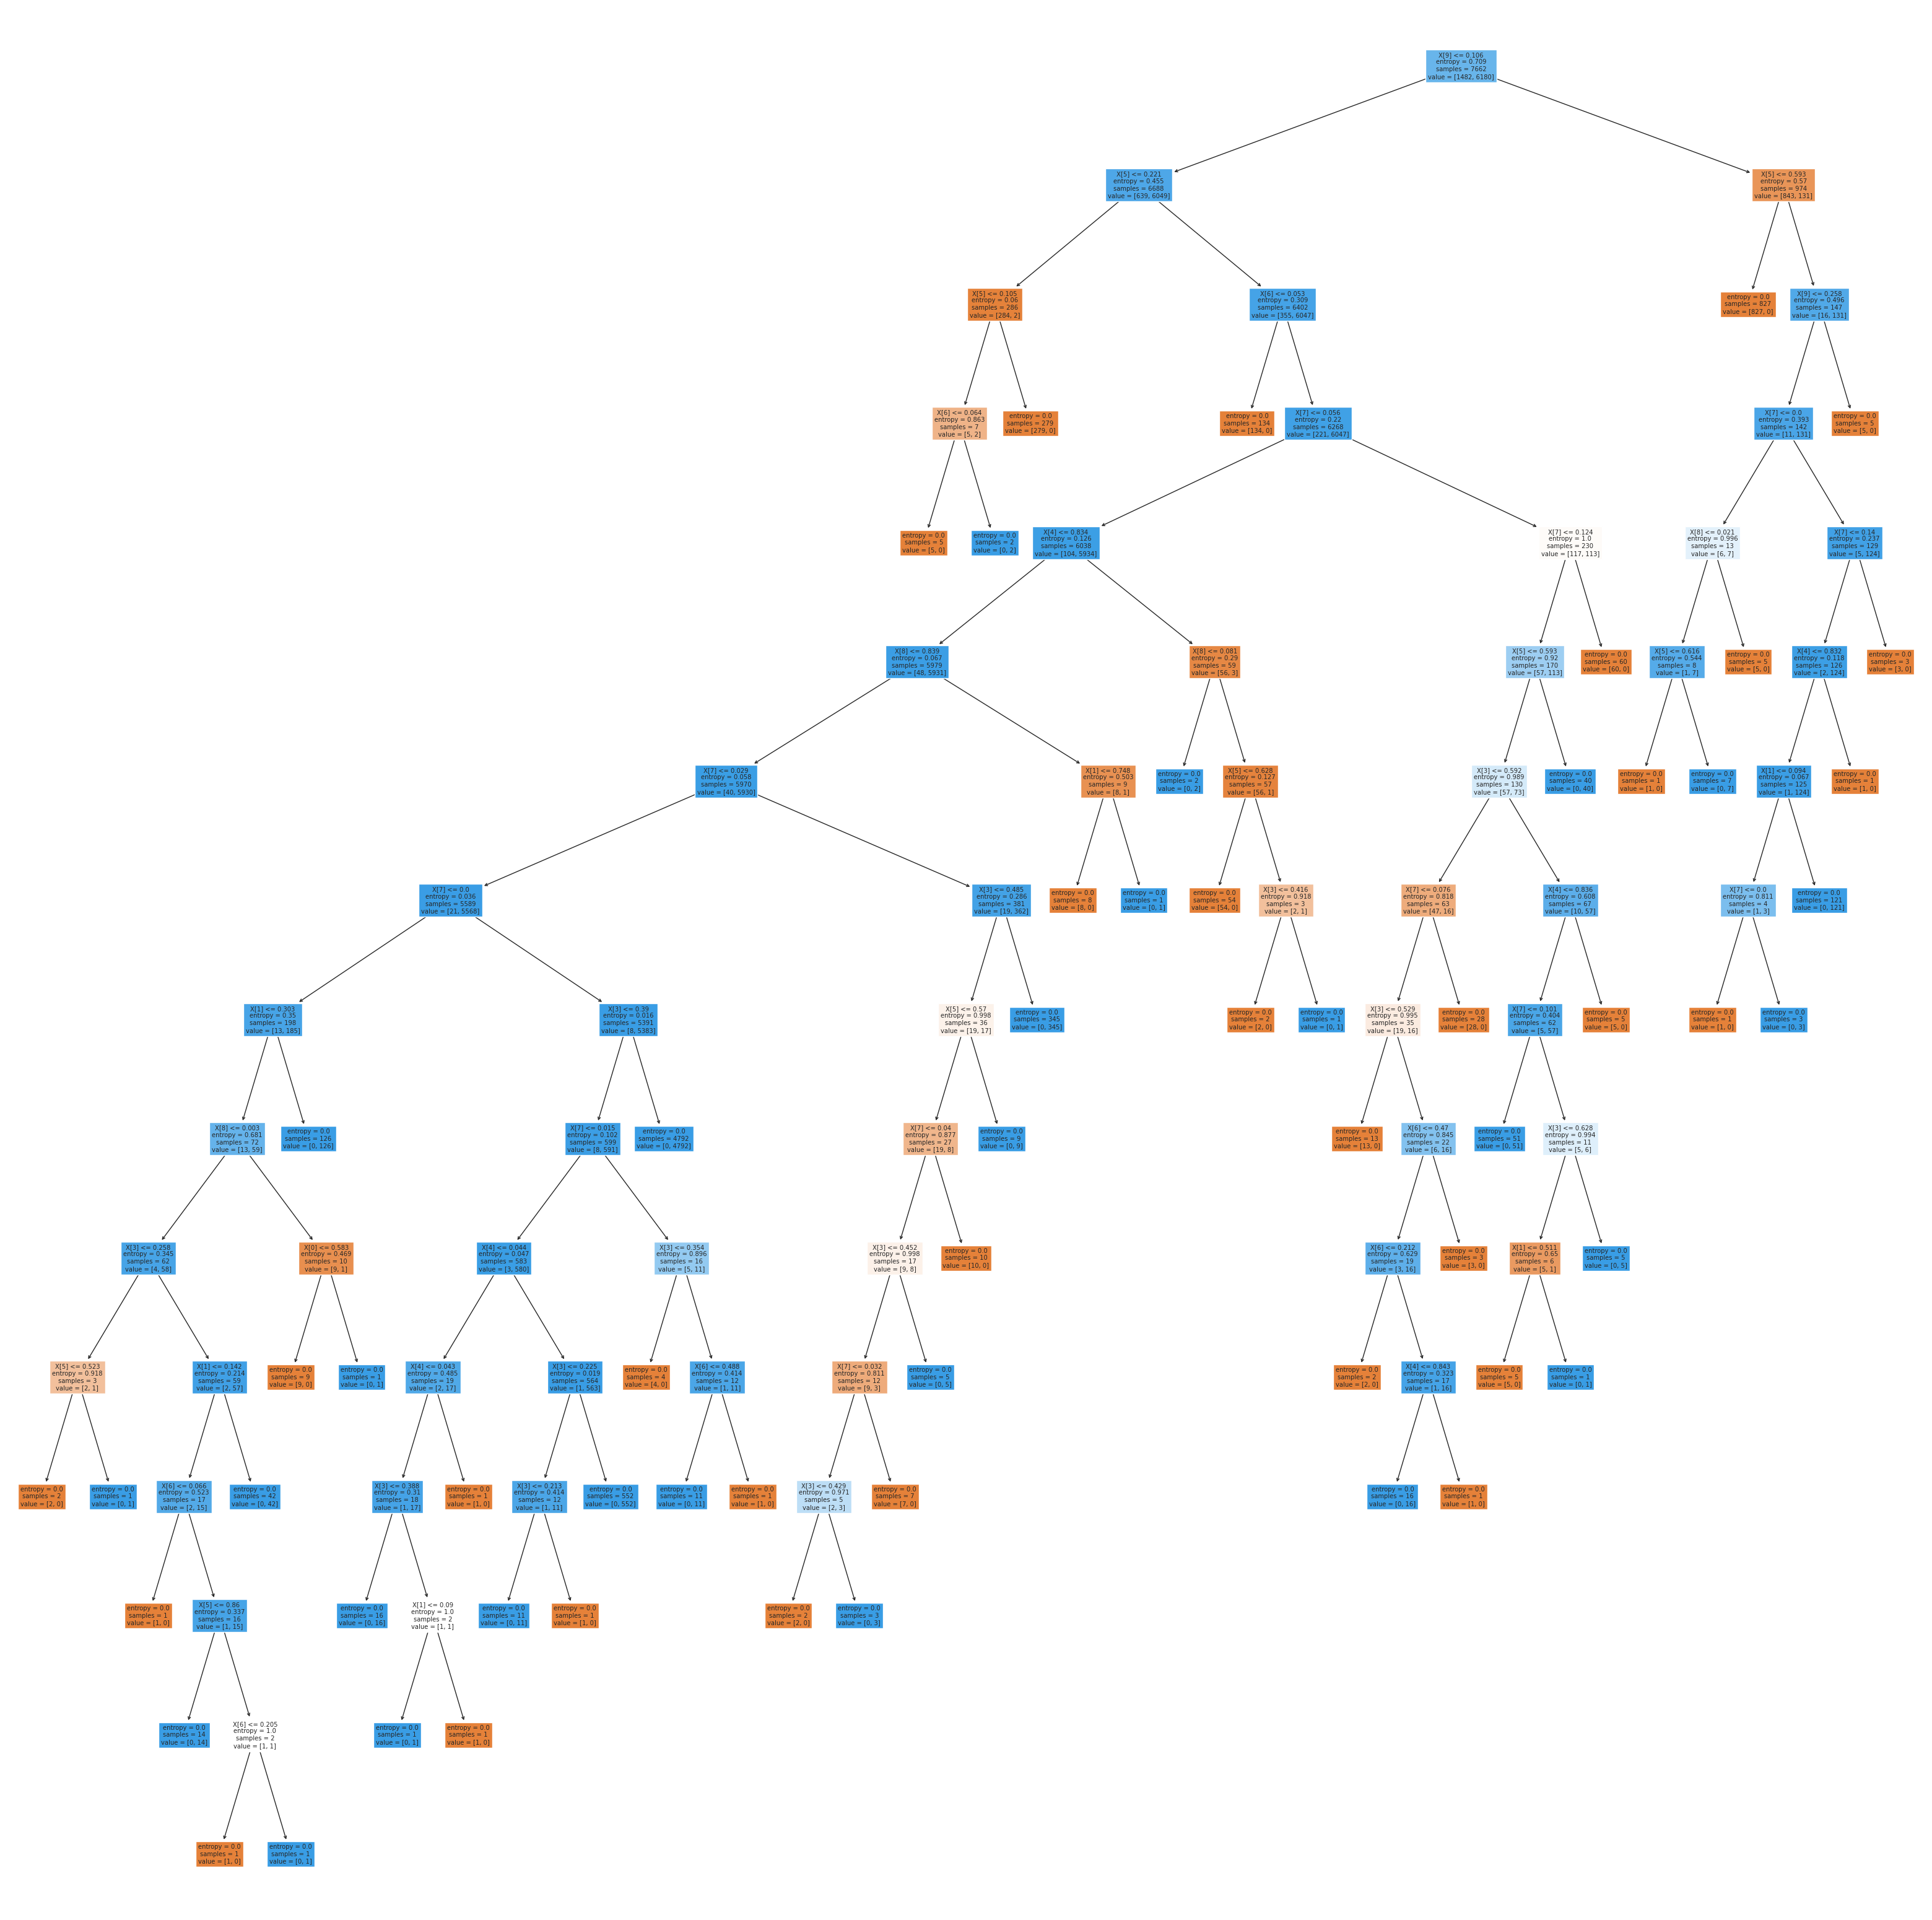

In [311]:
# show tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
tree.plot_tree(model, filled=True)
plt.show()


In [305]:
# hyper tune random forest model and find the best

# hyper parameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(2, 20)),
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.990864 using {'criterion': 'entropy', 'max_depth': 10}


In [316]:
# create model with best parameters
model = RandomForestClassifier(criterion='entropy', max_depth=10)

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


/tmp/ipykernel_1241669/3079640981.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.9879958246346555


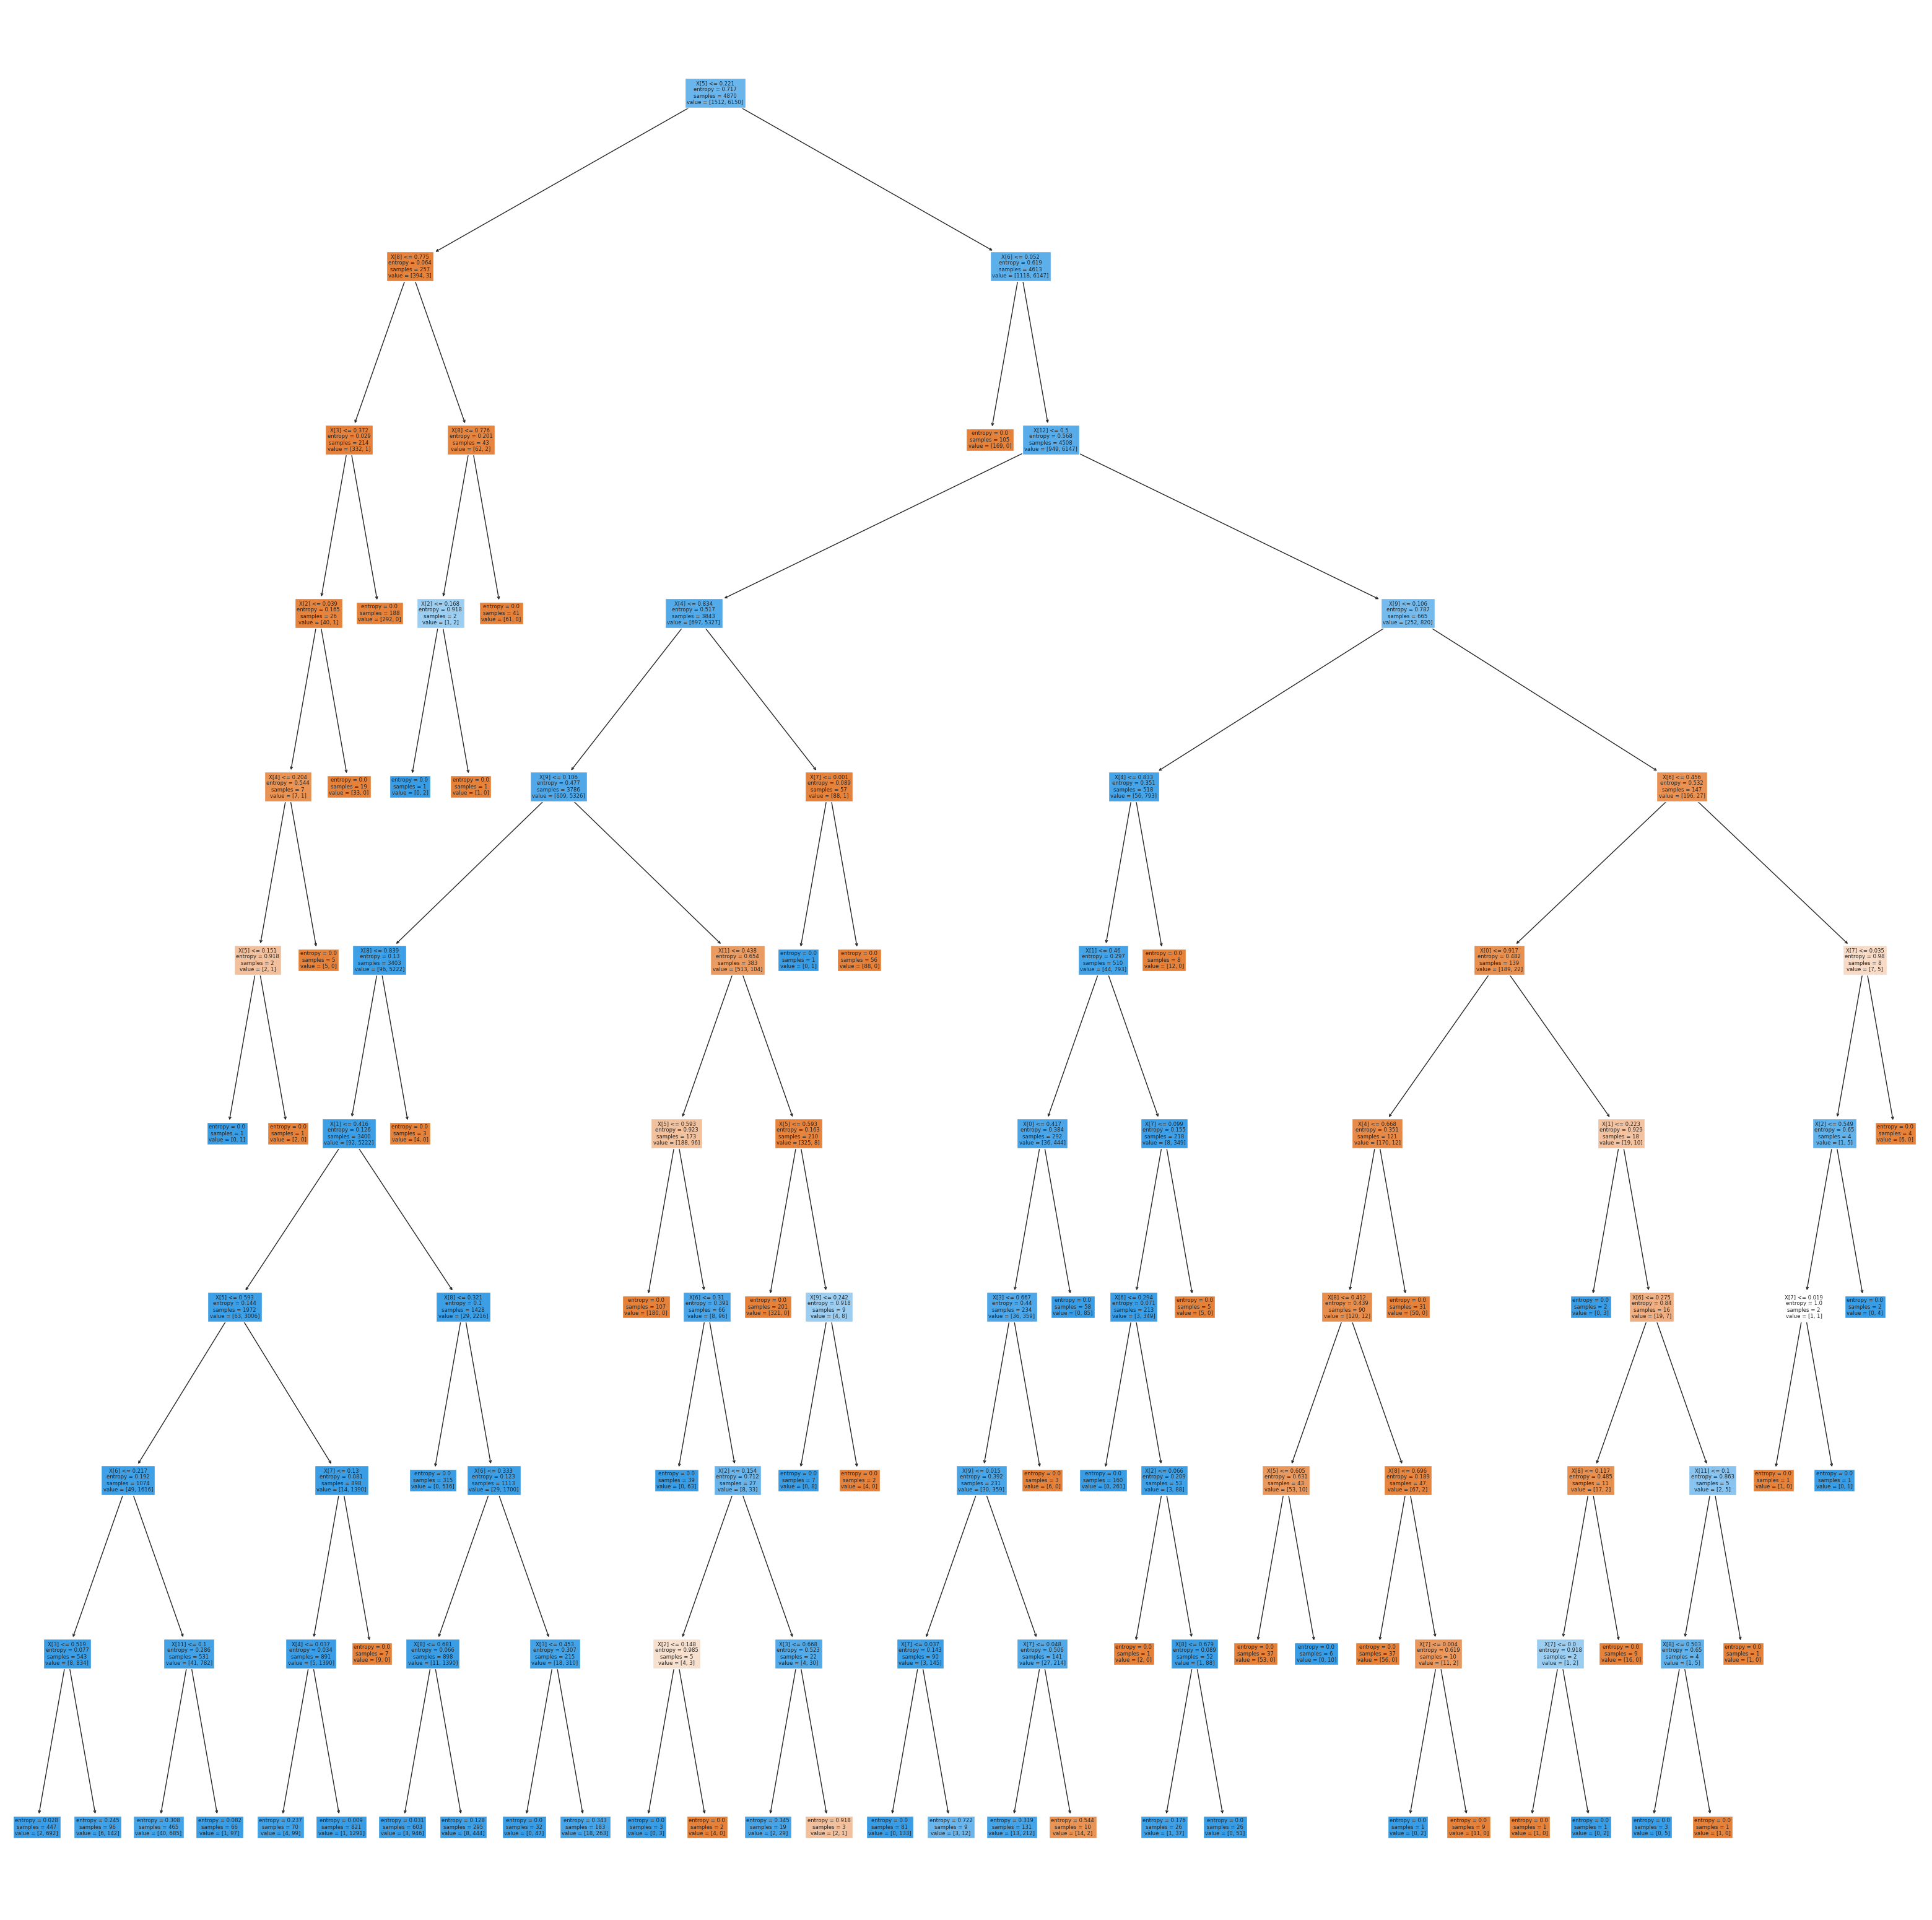

In [317]:
# show tree

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
tree.plot_tree(model.estimators_[0], filled=True)
plt.show()

### Questions

1. How did the DT compare to the RF in performance? Why?
   - _Answer_
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
   - _Answer_
3. What is ensemble learning? What are its pros and cons?
   - _Answer_
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
   Which of these categories does RF fall under? - _Answer_


# Task 4: Domain Gap (15%)

Evaluate your CNN model from task 2 on SVHN data without retraining your model.

In [308]:
# TODO: Implement task 4

### Questions
1. How did your model perform? Why is it better/worse?
    - *Answer*
2. What is domain gap in the context of ML?
    - *Answer*
3. Suggest two ways through which the problem of domain gap can be tackled.
    - *Answer*